In [1]:
# %pip install tensorflow_cpu==2.18.0

In [2]:
# %pip install keras


## Regression

In [3]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [4]:
import tensorflow as tf
print(tf.__version__)


2.18.0


In [5]:
import pandas as pd
import numpy as np
import keras

import warnings
warnings.simplefilter('ignore', FutureWarning)

In [6]:
filepath='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv'
concrete_data = pd.read_csv(filepath)

concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [7]:
concrete_data.shape

(1030, 9)

In [8]:
concrete_data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [9]:
concrete_data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [10]:
concrete_data_columns = concrete_data.columns

In [11]:
predictors = concrete_data[concrete_data_columns[concrete_data_columns != 'Strength']] # all columns except Strength
target = concrete_data['Strength'] # Strength column

In [12]:
predictors.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [13]:
predictors_norm = (predictors - predictors.mean()) / predictors.std()
predictors_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


In [15]:
target.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

In [14]:
n_cols = predictors_norm.shape[1] # number of predictors

In [19]:
n_cols

8

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input

In [17]:
def regression_model():
    # create model
    model = Sequential()
    model.add(Input(shape=(n_cols,)))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [20]:
# build the model
model = regression_model()

In [21]:
# fit the model
model.fit(predictors_norm, target, validation_split=0.3, epochs=100, verbose=2)

Epoch 1/100
23/23 - 1s - 38ms/step - loss: 1633.2893 - val_loss: 1117.2472
Epoch 2/100
23/23 - 0s - 5ms/step - loss: 1500.5846 - val_loss: 975.5190
Epoch 3/100
23/23 - 0s - 5ms/step - loss: 1272.9146 - val_loss: 755.9138
Epoch 4/100
23/23 - 0s - 5ms/step - loss: 930.1559 - val_loss: 481.3270
Epoch 5/100
23/23 - 0s - 5ms/step - loss: 553.0948 - val_loss: 260.3663
Epoch 6/100
23/23 - 0s - 5ms/step - loss: 313.7539 - val_loss: 177.4929
Epoch 7/100
23/23 - 0s - 5ms/step - loss: 244.1379 - val_loss: 164.8585
Epoch 8/100
23/23 - 0s - 5ms/step - loss: 221.1068 - val_loss: 167.0406
Epoch 9/100
23/23 - 0s - 5ms/step - loss: 207.9200 - val_loss: 164.7664
Epoch 10/100
23/23 - 0s - 5ms/step - loss: 197.1824 - val_loss: 161.7742
Epoch 11/100
23/23 - 0s - 5ms/step - loss: 188.3918 - val_loss: 158.9237
Epoch 12/100
23/23 - 0s - 5ms/step - loss: 181.3653 - val_loss: 157.8160
Epoch 13/100
23/23 - 0s - 5ms/step - loss: 175.8137 - val_loss: 155.1878
Epoch 14/100
23/23 - 0s - 5ms/step - loss: 168.8406 - v

In [22]:
def regression_model():
    input_colm = predictors_norm.shape[1] # Number of input features
    # create model
    model = Sequential()
    model.add(Input(shape=(input_colm,)))  # Set the number of input features 
    model.add(Dense(50, activation='relu'))  
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu')) 
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))  
    model.add(Dense(1))  # Output layer
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [23]:
model = regression_model()
model.fit(predictors_norm, target, validation_split=0.1, epochs=100, verbose=2)

Epoch 1/100
29/29 - 2s - 57ms/step - loss: 1461.7382 - val_loss: 846.8385
Epoch 2/100
29/29 - 0s - 4ms/step - loss: 489.5653 - val_loss: 203.1628
Epoch 3/100
29/29 - 0s - 4ms/step - loss: 231.6350 - val_loss: 183.1444
Epoch 4/100
29/29 - 0s - 5ms/step - loss: 196.9732 - val_loss: 177.6007
Epoch 5/100
29/29 - 0s - 5ms/step - loss: 183.2000 - val_loss: 156.6969
Epoch 6/100
29/29 - 0s - 5ms/step - loss: 164.0904 - val_loss: 146.8222
Epoch 7/100
29/29 - 0s - 6ms/step - loss: 148.7939 - val_loss: 128.4468
Epoch 8/100
29/29 - 0s - 5ms/step - loss: 132.9190 - val_loss: 119.5272
Epoch 9/100
29/29 - 0s - 5ms/step - loss: 114.5891 - val_loss: 107.1647
Epoch 10/100
29/29 - 0s - 4ms/step - loss: 98.4033 - val_loss: 99.0160
Epoch 11/100
29/29 - 0s - 4ms/step - loss: 83.2345 - val_loss: 89.9965
Epoch 12/100
29/29 - 0s - 5ms/step - loss: 74.9984 - val_loss: 81.1361
Epoch 13/100
29/29 - 0s - 4ms/step - loss: 65.2453 - val_loss: 74.1172
Epoch 14/100
29/29 - 0s - 4ms/step - loss: 58.6343 - val_loss: 76.

- Adding more hidden layers to the model increases its capacity to learn and represent complex relationships within the data. This allows the model to better identify, as a result, the model becomes more effective at fitting the training data and potentially improving its predictions.
- By reducing the proportion of data set aside for validation and using a larger portion for training, the model has access to more examples to learn from. This additional training data helps the model improve its understanding of the underlying trends, which can lead to better overall performance.

## Classification

In [24]:
import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from keras.utils import to_categorical

In [25]:
import matplotlib.pyplot as plt

In [26]:
from keras.datasets import mnist

# read the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [27]:
X_train.shape

(60000, 28, 28)

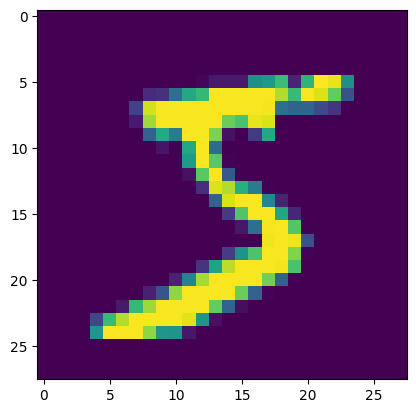

In [28]:
plt.imshow(X_train[0])

In [29]:
# flatten images into one-dimensional vector

num_pixels = X_train.shape[1] * X_train.shape[2] # find size of one-dimensional vector

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32') # flatten training images
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32') # flatten test images

In [30]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [32]:
X_train.shape

(60000, 784)

In [33]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
print(num_classes)

10


In [34]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [35]:
y_train.shape

(60000, 10)

In [36]:
# define classification model
def classification_model():
    # create model
    
    model = Sequential()
    model.add(Input(shape=(num_pixels,)))
    model.add(Dense(num_pixels, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [37]:
# build the model
model = classification_model()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/10
1875/1875 - 18s - 9ms/step - accuracy: 0.9429 - loss: 0.1883 - val_accuracy: 0.9595 - val_loss: 0.1361
Epoch 2/10
1875/1875 - 17s - 9ms/step - accuracy: 0.9757 - loss: 0.0791 - val_accuracy: 0.9738 - val_loss: 0.0828
Epoch 3/10
1875/1875 - 17s - 9ms/step - accuracy: 0.9838 - loss: 0.0529 - val_accuracy: 0.9787 - val_loss: 0.0703
Epoch 4/10
1875/1875 - 23s - 12ms/step - accuracy: 0.9875 - loss: 0.0392 - val_accuracy: 0.9782 - val_loss: 0.0719
Epoch 5/10
1875/1875 - 20s - 11ms/step - accuracy: 0.9901 - loss: 0.0312 - val_accuracy: 0.9757 - val_loss: 0.0879
Epoch 6/10
1875/1875 - 18s - 10ms/step - accuracy: 0.9914 - loss: 0.0270 - val_accuracy: 0.9804 - val_loss: 0.0734
Epoch 7/10
1875/1875 - 17s - 9ms/step - accuracy: 0.9930 - loss: 0.0219 - val_accuracy: 0.9822 - val_loss: 0.0765
Epoch 8/10
1875/1875 - 21s - 11ms/step - accuracy: 0.9937 - loss: 0.0180 - val_accuracy: 0.9802 - val_loss: 0.0903
Epoch 9/10
1875/1875 - 17s - 9ms/step - accuracy: 0.9945 - loss: 0.0172 - val_accura

In [38]:
print('Accuracy: {}% \n Error: {}'.format(scores[1], 1 - scores[1]))       

Accuracy: 0.9797999858856201% 
 Error: 0.020200014114379883


In [39]:
model.save('classification_model.keras')

In [ ]:
pretrained_model = keras.saving.load_model('classification_model.keras')

In [ ]:
def classification_model():
    # create model
    
    model = Sequential()
    model.add(Input(shape=(num_pixels,)))
    model.add(Dense(num_pixels, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [40]:
def classification_model_6layers():
    # create model
    
    model = Sequential()
    model.add(Input(shape=(num_pixels,)))
    model.add(Dense(num_pixels, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# build the model
model_6layers = classification_model_6layers()

# fit the model
model_6layers.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)

# evaluate the model
scores_6layers = model_6layers.evaluate(X_test, y_test, verbose=0)

print('Accuracy_3_layers: {}% \n Accuracy_6_layers: {}'.format(scores[1], scores_6layers[1]))   


Epoch 1/10
1875/1875 - 19s - 10ms/step - accuracy: 0.9326 - loss: 0.2212 - val_accuracy: 0.9593 - val_loss: 0.1363
Epoch 2/10
1875/1875 - 18s - 10ms/step - accuracy: 0.9709 - loss: 0.0999 - val_accuracy: 0.9702 - val_loss: 0.1040
Epoch 3/10
1875/1875 - 16s - 9ms/step - accuracy: 0.9786 - loss: 0.0725 - val_accuracy: 0.9764 - val_loss: 0.0805
Epoch 4/10
1875/1875 - 16s - 8ms/step - accuracy: 0.9830 - loss: 0.0569 - val_accuracy: 0.9749 - val_loss: 0.0948
Epoch 5/10
1875/1875 - 17s - 9ms/step - accuracy: 0.9863 - loss: 0.0458 - val_accuracy: 0.9759 - val_loss: 0.0931
Epoch 6/10
1875/1875 - 17s - 9ms/step - accuracy: 0.9879 - loss: 0.0404 - val_accuracy: 0.9820 - val_loss: 0.0686
Epoch 7/10
1875/1875 - 18s - 9ms/step - accuracy: 0.9898 - loss: 0.0339 - val_accuracy: 0.9762 - val_loss: 0.1056
Epoch 8/10
1875/1875 - 17s - 9ms/step - accuracy: 0.9916 - loss: 0.0295 - val_accuracy: 0.9809 - val_loss: 0.0842
Epoch 9/10
1875/1875 - 17s - 9ms/step - accuracy: 0.9920 - loss: 0.0266 - val_accuracy